# Image Filtering using FFT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plotImFFT(f):
    F = np.fft.fft2(f)
    F = np.fft.fftshift(F)
    plt.subplot(1,2,1)
    plt.imshow(f)
    plt.subplot(1,2,2)
    plt.imshow(abs(F))
    plt.xticks(np.arange(0, 200, 50), np.arange(-100, 100, 50))
    plt.yticks(np.arange(0, 200, 50), np.arange(-100, 100, 50))

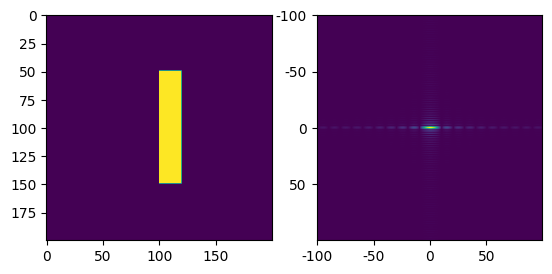

In [3]:
f = np.zeros((200,200))
f[50:150,100:120] = 1
plotImFFT(f)

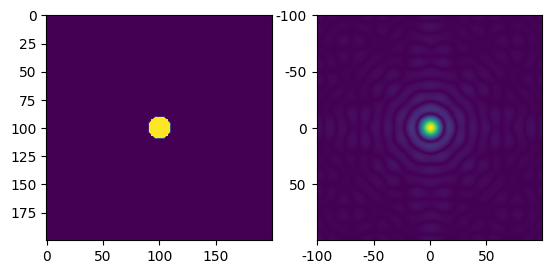

In [4]:
f = np.zeros((200,200))
x, y = np.linspace(0,199,200), np.linspace(0,199,200)
xv, yv = np.meshgrid(x,y)
xc, yc = 100, 100
ind = (xv-xc)**2+(yv-yc)**2<100
f[ind] = 1
plotImFFT(f)

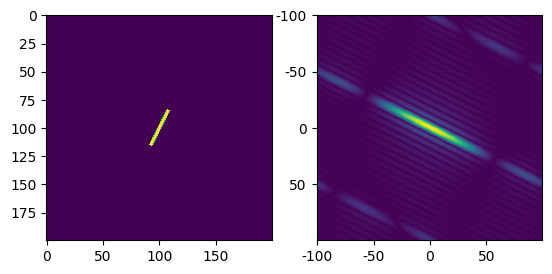

In [5]:
f = np.zeros((200,200))
x, y = np.linspace(0,199,200), np.linspace(0,199,200)
xv, yv = np.meshgrid(x,y)
xc, yc = 100, 100
ind = (abs(2*(xv-xc)+(yv-yc))<4)*(abs((xv-xc)-2*(yv-yc))<40)
f[ind] = 1
plotImFFT(f)

## Steps:

1. Pad the image with zeros
2. Center the transform
3. Compute DFT of the image $F(u,v)$
4. Multiply with the filter function $H(u,v)$
5. Shift back in the frequency domain
6. Extract the image from the padded image

In [6]:
f = plt.imread('rubiks.png')

In [7]:
def plotImFFT2(f):
    F = np.fft.fft2(f)
    F = np.fft.fftshift(F)
    plt.subplot(1,2,1)
    plt.imshow(f)
    plt.subplot(1,2,2)
    plt.imshow(np.log(abs(F)))
    plt.xticks(np.arange(0, 200, 50), np.arange(-100, 100, 50))
    plt.yticks(np.arange(0, 200, 50), np.arange(-100, 100, 50))

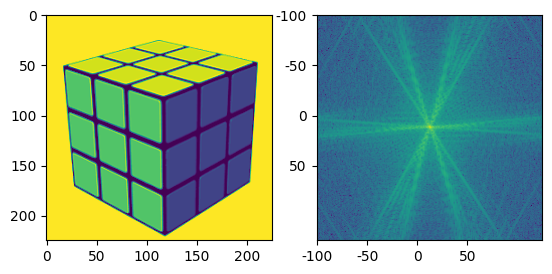

In [8]:
plotImFFT2(f[:,:,0])

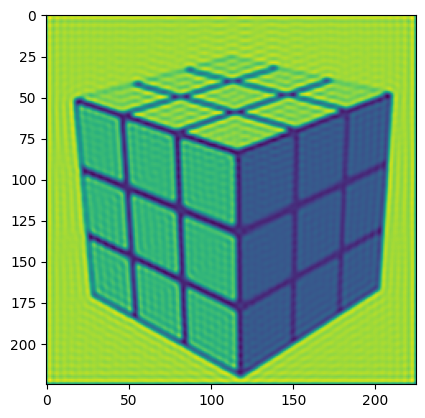

In [9]:
h = f[:,:,0]
m, n = h.shape
h = np.pad(h, ((m, 0), (n, 0)), 'constant', constant_values=0)
F = np.fft.fft2(h)
F = np.fft.fftshift(F)
H = np.zeros((2*m, 2*n))
x, y = np.linspace(0,2*m-1,2*m), np.linspace(0,2*n-1,2*n)
xv, yv = np.meshgrid(x,y)
xc, yc = m, n
ind = (abs((xv-xc)**2+(yv-yc)**2)<10000)
plt.imshow(ind)
#ind = (abs(2*(xv-xc)+(yv-yc))<40)#*(abs((xv-xc)-2*(yv-yc))<40)
H[ind] = 1
F = F*H
F = np.fft.ifftshift(F)
h2 = np.fft.ifft2(F)
h2 = h2[m:,n:]
plt.imshow(np.real(h2))

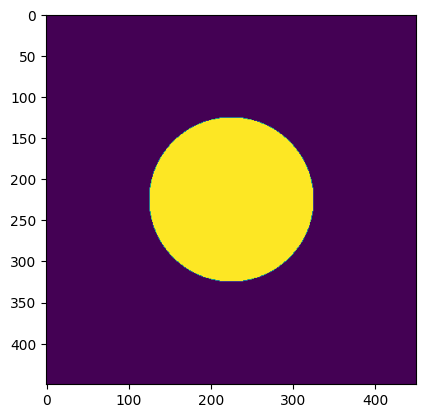

In [10]:
plt.imshow(ind)

* Low pass filter: mainly for getting the shape of the objects in the image, denoising the image, blur the image
* High pass filter: mainly for making the image more sharp, and getting the outlines of the objects inside the image. 

Let $(x_c, y_c)$ be the center, $D(x,y)$ is the distance from the point $(x,y)$ to the center:
$$D(x,y)=\sqrt{(x-x_c)^2+(y-y_c)^2}$$

Some commonly used filters:<br/>

* Ideal filter

$$H(x,y) = \begin{cases}1 \quad\text{ if } D(x,y)<D_0 \\ 0 \quad\text{ if } D(x,y)\geq D_0 \end{cases}$$

* Butterworth filter

$$B(x,y) = \dfrac{1}{1+(D(x,y)/D_0)^{2n}},$$

where $n$ is a positive integer. We can take $n=1$

* Gaussian filter

$$G(x,y) = e^{-(D(x,y)/D_0)^2}$$

In [14]:
def Filter(x_xc, y_yc, D0, type='Ideal'):
    D = np.sqrt((x_xc)**2+(y_yc)**2)
    if type == 'Ideal':
        H = D<D0
    elif type == 'Gaussian':
        H = np.exp(-(D/D0)**2)
    elif type == 'Butterworth':
        H = 1/(1+(D/D0)**2) # here we choose n=1
    return H

In [19]:
# showing the image of these filters. 
def plot_filters(n=100):
    plt.subplot(1,3,1)
    plt.imshow(Filter(xv-xc, yv-yc, n, type='Ideal')); plt.title('Ideal, low pass')
    plt.subplot(1,3,2)
    plt.imshow(Filter(xv-xc, yv-yc, n, type='Gaussian')); plt.title('Gaussian, low pass')
    plt.subplot(1,3,3)
    plt.imshow(Filter(xv-xc, yv-yc, n, type='Butterworth')); plt.title('Butterworth, low pass')

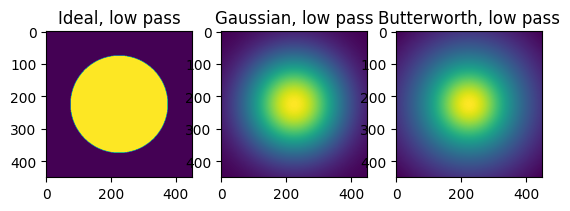

In [21]:
plot_filters(150)

In [37]:
def filterImage(f, D0, filter_type='Ideal', filter_mode='low'):
    h = np.copy(f)
    m, n = h.shape
    h = np.pad(h, ((m, 0), (n, 0)), 'constant', constant_values=0)
    F = np.fft.fft2(h)
    F = np.fft.fftshift(F)
    H = np.zeros((2*m, 2*n))
    x, y = np.linspace(0,2*m-1,2*m), np.linspace(0,2*n-1,2*n)
    xv, yv = np.meshgrid(x,y)
    xc, yc = m, n
    if filter_mode == 'low':
        H = Filter(xv-xc, yv-yc, D0, type=filter_type)
    elif filter_mode == 'high':
        H = 1-Filter(xv-xc, yv-yc, D0, type=filter_type)
    F = F*H
    F = np.fft.ifftshift(F)
    h2 = np.fft.ifft2(F)
    h2 = h2[m:,n:]
    #plt.imshow(np.real(h2))
    return np.real(h2)

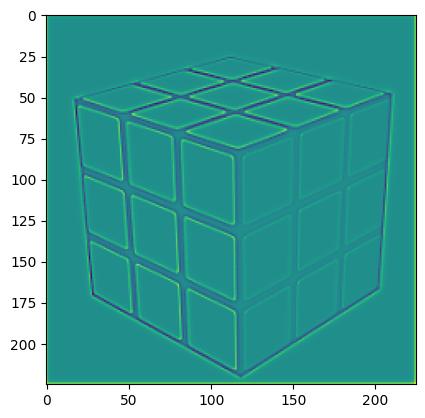

In [33]:
h2 = filterImage(f[:,:,0],100,filter_type='Butterworth', filter_mode='high')

In [35]:
filters_dict = {0:['Ideal', 'low'], 1:['Gaussian', 'low'], 2:['Butterworth', 'low'],
                3:['Ideal', 'high'], 4:['Gaussian', 'high'], 5:['Butterworth', 'high']}

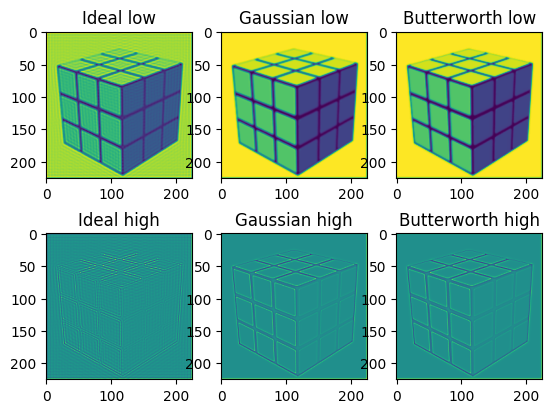

In [41]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(filterImage(f[:,:,0],100,
                           filter_type=filters_dict[i][0], filter_mode=filters_dict[i][1]))
    plt.title(' '.join(filters_dict[i]))

### Low pass filter is good for image denoising, and high pass filter is good for image segmentation

In [55]:
# A function to add noise to an image
# Parameters
# ----------
# image : ndarray
#     Input image data. Will be converted to float.
# mode : str
#     One of the following strings, selecting the type of noise to add:

#     'gauss'     Gaussian-distributed additive noise.
#     'poisson'   Poisson-distributed noise generated from the data.
#     's&p'       Replaces random pixels with 0 or 1.
#     'speckle'   Multiplicative noise using out = image + n*image,where
#                 n is uniform noise with specified mean & variance.

import numpy as np
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col = image.shape
        ch = 1
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col))
        gauss = gauss.reshape(row,col)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col = image.shape
        ch = 1
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
    # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
        out[coords] = 1

    # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col = image.shape
        ch = 1
        gauss = np.random.randn(row,col)
        gauss = gauss.reshape(row,col)        
        noisy = image + image * gauss
    return noisy

In [56]:
f_noisy = noisy("gauss", f[:,:,0])

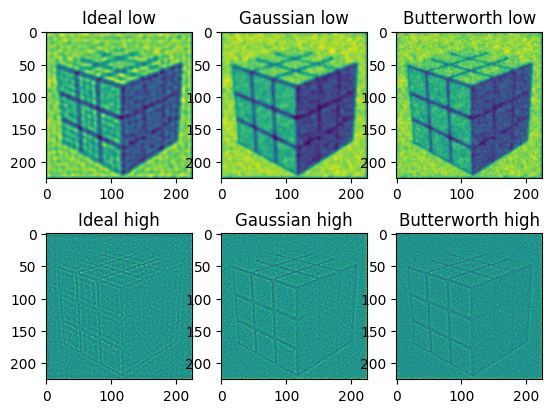

In [59]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(filterImage(f_noisy,50,
                           filter_type=filters_dict[i][0], filter_mode=filters_dict[i][1]))
    plt.title(' '.join(filters_dict[i]))

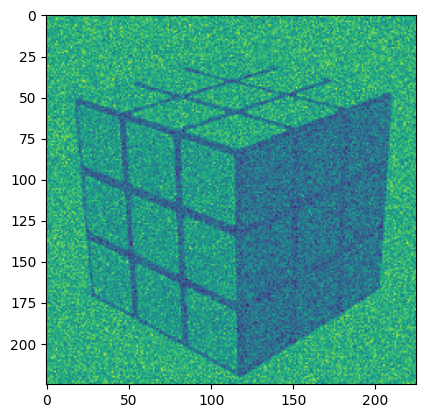

In [58]:
plt.imshow(f_noisy)